In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

data1=pd.read_excel("C:\Desktop\AirQualityUCI.xlsx")
pd.DataFrame(data1)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [3]:
data1.replace(-200, np.nan, inplace=True)  
pd.DataFrame(data1)
data1.isnull().sum()


Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [4]:
new_data=data1.iloc[:,2:15]
pd.DataFrame(new_data)
new_data.fillna(np.mean(new_data),inplace=True)
new_data.isnull().sum()
   

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

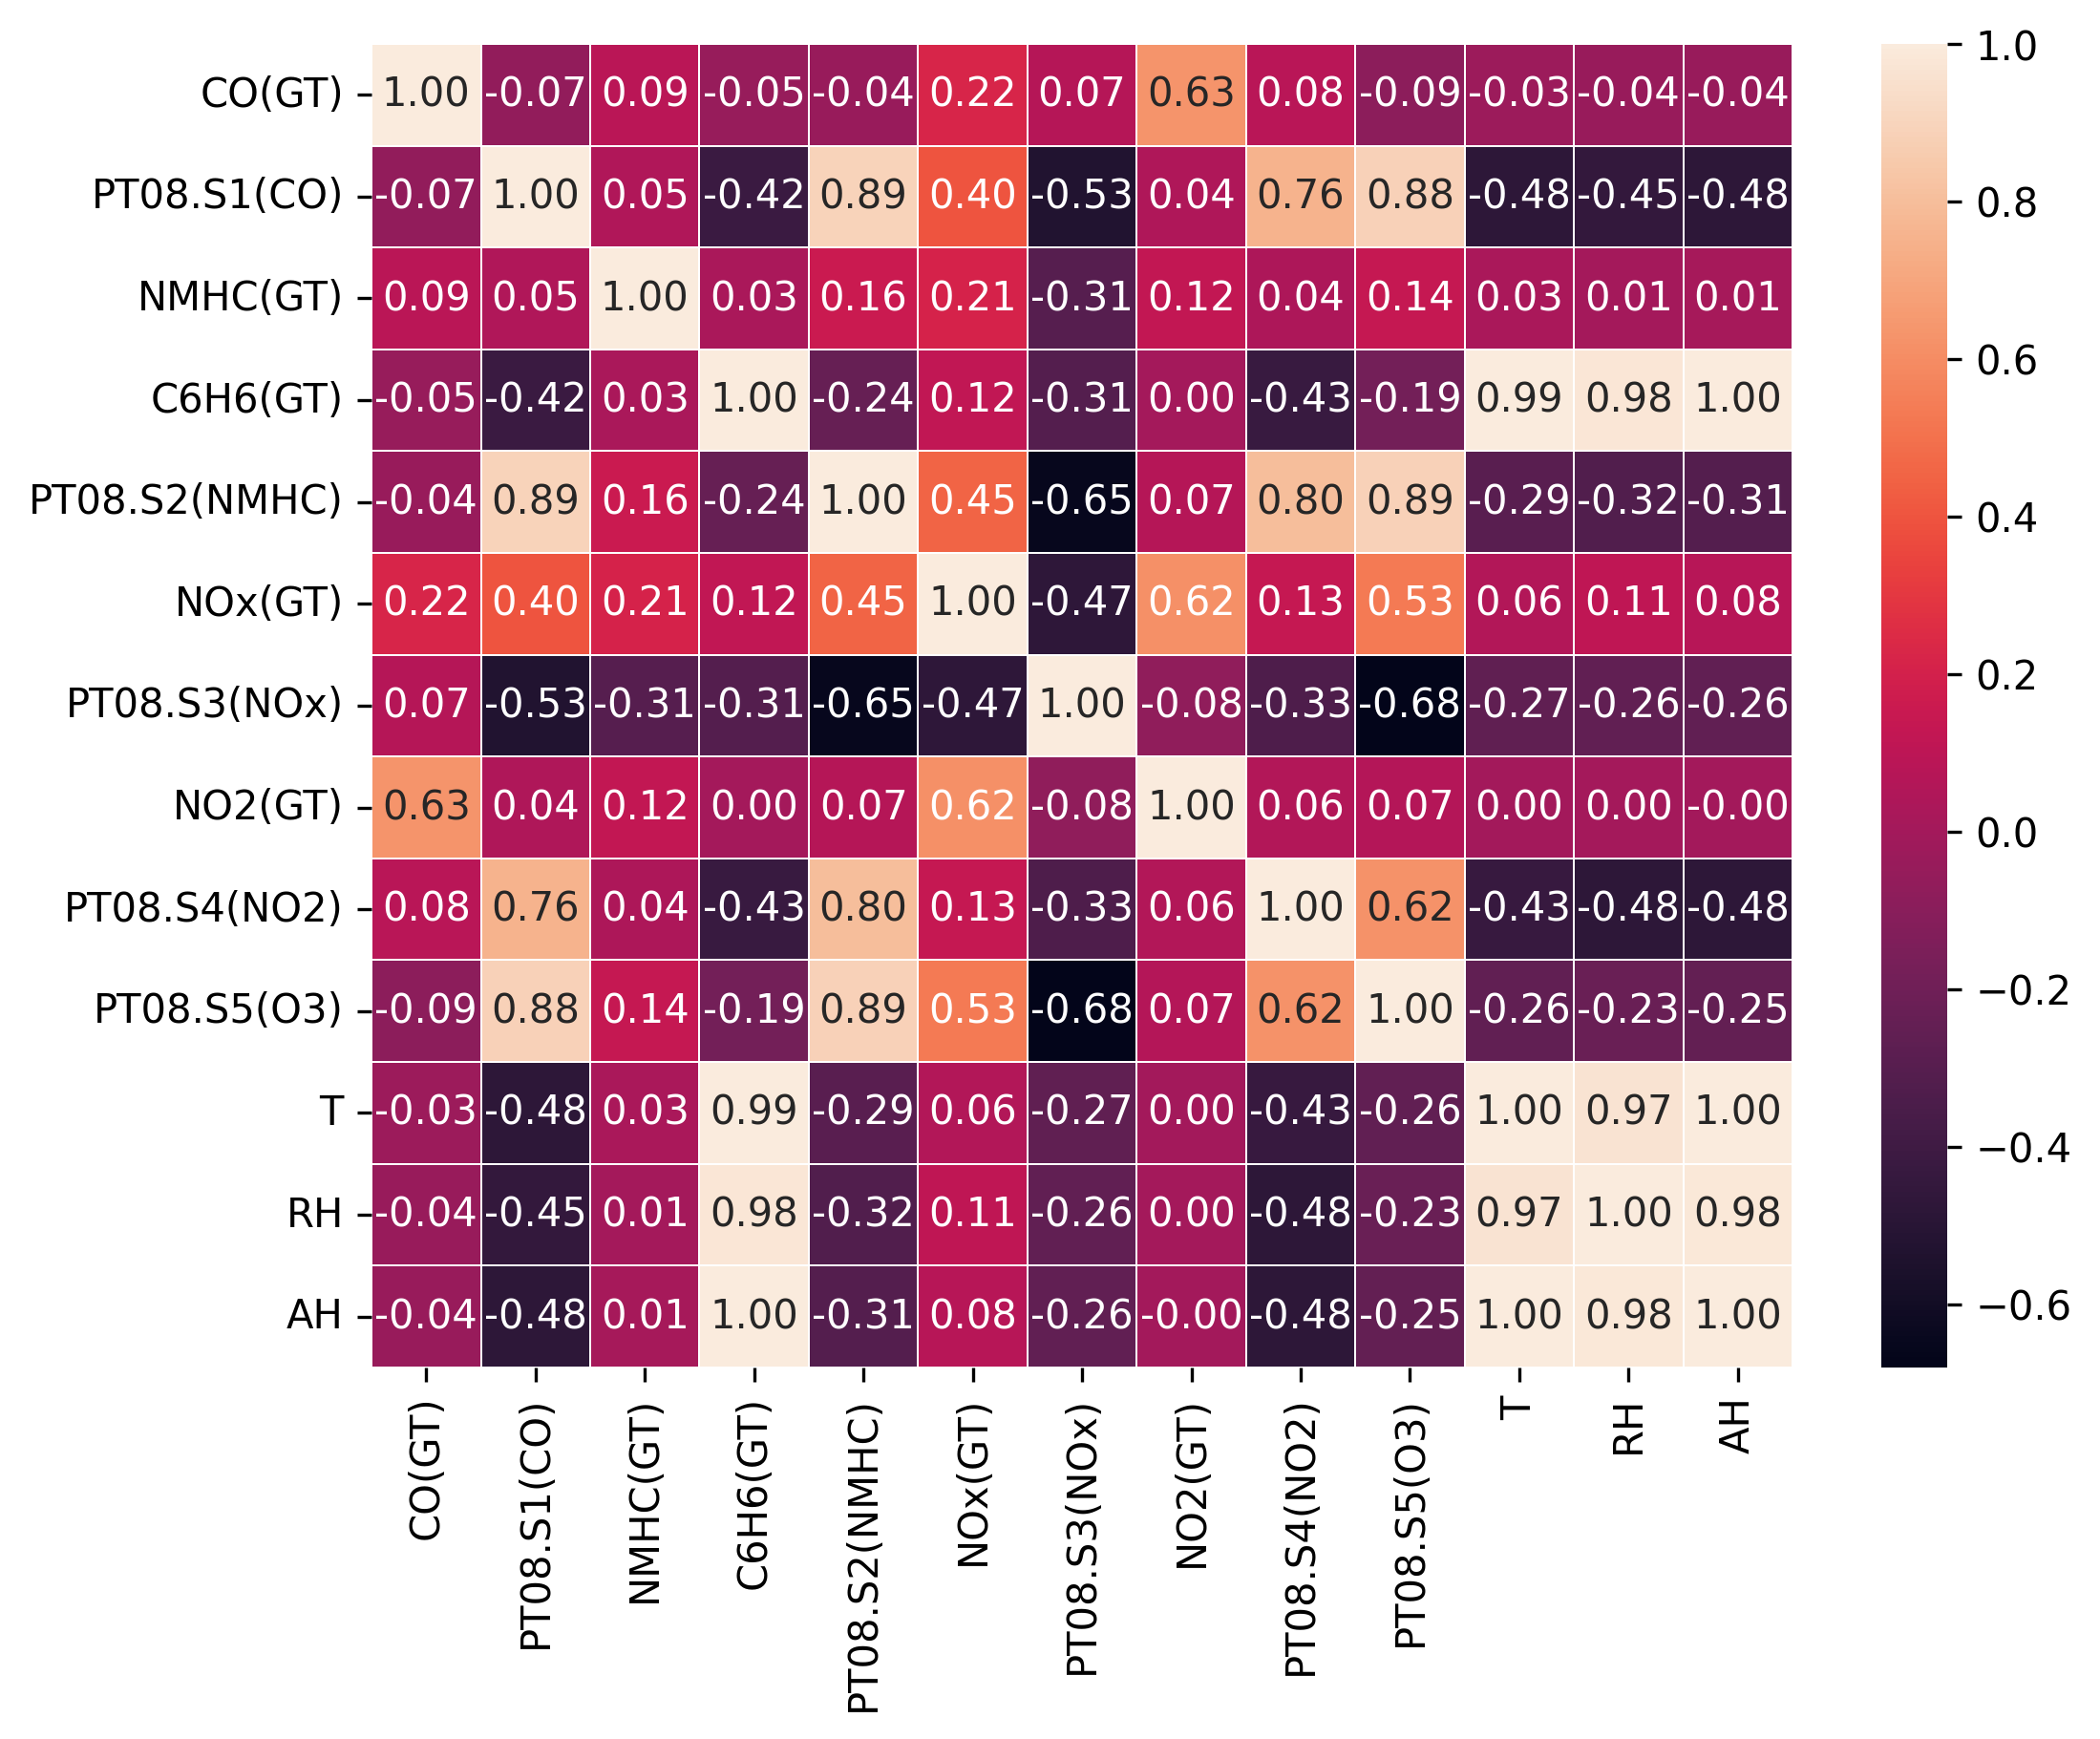

In [5]:
import seaborn as sns
corr = new_data.corr(method = 'pearson')
plt.figure(figsize=(8,6), dpi =300)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.4)
plt.show()

T,C6H6(GT) and AH have strong +ve correlation with RH. PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2) and PT08.S5 have -ve correlation with RH. T and C6H6(GT) are strongy correlated(0.99),so we can include any one of them in our model.PT08.S5(O3) is highly correlated with PT08.S1(CO) and PT08.S2(NMHC) so we can ignore PT08.S5(O3) in our regression model. AH can also be ignored if we include C6H6 in our model because they are highly correlated(1.00).  

In [6]:
new_data=(new_data-np.mean(new_data))/(np.max(new_data)-np.min(new_data))
print(new_data.describe())

             CO(GT)   PT08.S1(CO)      NMHC(GT)      C6H6(GT)  PT08.S2(NMHC)  \
count  9.357000e+03  9.357000e+03  9.357000e+03  9.357000e+03    9357.000000   
mean  -1.452357e-01  2.096239e-01 -9.676825e-03 -1.674167e-01       0.154025   
std    6.802026e-02  8.752853e-02  3.733789e-02  3.388213e-02       0.099185   
min   -1.778268e-01  2.047010e-17 -1.753421e-01 -1.778092e-01      -0.039849   
25%   -1.774307e-01  1.538020e-01  2.047010e-17 -1.762094e-01       0.078178   
50%   -1.770706e-01  2.011569e-01  2.047010e-17 -1.747683e-01       0.144259   
75%   -1.763144e-01  2.619261e-01  2.047010e-17 -1.725164e-01       0.219973   
max    2.047010e-17  5.566793e-01  2.503124e-01  2.047010e-17       0.619429   

            NOx(GT)  PT08.S3(NOx)       NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9.357000e+03   9357.000000  9.357000e+03  9.357000e+03  9357.000000   
mean  -7.337545e-02      0.118156 -1.130765e-01  3.329606e-01     0.183005   
std    7.742741e-02      0.093738  5.451308e-

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2)
0,-0.176927,0.311892,-1.238458e-01,-0.173584,0.198636,-0.118084,0.202507,-0.137170,0.431450
1,-0.177143,0.287494,-1.375301e-01,-0.174479,0.165956,-0.140771,0.244821,-0.144732,0.383465
2,-0.177071,0.327017,-1.461728e-01,-0.174623,0.160374,-0.130688,0.232667,-0.136810,0.381934
3,-0.177071,0.317474,-1.490538e-01,-0.174539,0.163615,-0.115923,0.215381,-0.133929,0.392467
4,-0.177287,0.280292,-1.594971e-01,-0.175516,0.123012,-0.130688,0.256074,-0.136090,0.358707
...,...,...,...,...,...,...,...,...,...
9352,-0.176747,0.295417,2.047010e-17,-0.172991,0.218712,-0.007997,0.016058,-0.109513,0.317024
9353,-0.176999,0.240769,2.047010e-17,-0.173774,0.191974,-0.050635,0.039556,-0.113330,0.277141
9354,-0.176999,0.233387,2.047010e-17,-0.173407,0.204758,-0.072350,0.039376,-0.114951,0.268948
9355,-0.177107,0.183151,2.047010e-17,-0.174425,0.168026,-0.093416,0.074757,-0.121793,0.197016


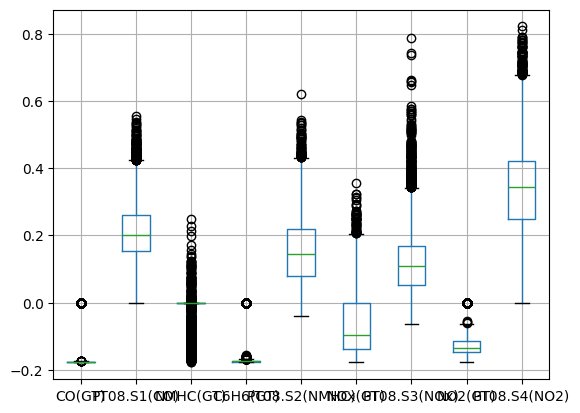

<Figure size 800x600 with 0 Axes>

In [7]:
x = new_data[['CO(GT)', 'PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)']]
       
y=new_data['RH']
x.boxplot()
plt.figure(figsize=(8,6))
#Q1 = x.quantile(0.25)
#Q3 = x.quantile(0.75)
#IQR=Q3-Q1
#new = (x< (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))
#for i in new.columns:
    #x[i].astype('float')
    #temp = x[i].mean()
    #x.loc[new[i],i]=temp
x


Using sklearn library

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15,random_state=42)
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
y_train= y_train.reshape(len(y_train),1)
y_test= y_test.reshape(len(y_test),1)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)




[-0.00144825]
[[ 0.00586959  0.05566554 -0.00511535  0.89387421 -0.12742908  0.04676433
  -0.02137837 -0.03811163  0.02303661]]


In [9]:
y_pred = regressor.predict(X_test)
y_pred
pred_data = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(pred_data)

        Actual  Predicted
0    -0.165313  -0.161405
1    -0.159902  -0.159102
2    -0.166249  -0.164637
3    -0.165628  -0.165566
4    -0.163737  -0.161521
...        ...        ...
1399 -0.166096  -0.162127
1400 -0.159092  -0.163521
1401 -0.154527  -0.158601
1402 -0.167239  -0.161721
1403 -0.158138  -0.162083

[1404 rows x 2 columns]


In [31]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2_score=r2_score( y_test,y_pred)
print(r2_score)

2.4178513426609738e-05
0.972733642021781


Linear Regression from scratch

Iteration: 0, Loss: 1.2916034954244797
Iteration: 100, Loss: 0.011875324442343968
Iteration: 200, Loss: 0.005647565973759374
Iteration: 300, Loss: 0.003314973691269244
Iteration: 400, Loss: 0.002282018844172903
Iteration: 500, Loss: 0.001723970350429693
Iteration: 600, Loss: 0.0013682337560001856
Iteration: 700, Loss: 0.0011170488941188996
Iteration: 800, Loss: 0.0009299919659618755
Iteration: 900, Loss: 0.0007868791331413437
Iteration: 1000, Loss: 0.0006756819901446821
Iteration: 1100, Loss: 0.0005883199153882498
Iteration: 1200, Loss: 0.0005190036454625118
Iteration: 1300, Loss: 0.00046345651238118127
Iteration: 1400, Loss: 0.00041847399195429734
Iteration: 1500, Loss: 0.000381637967197596
Iteration: 1600, Loss: 0.0003511162697131286
Iteration: 1700, Loss: 0.00032551656353528623
Iteration: 1800, Loss: 0.00030377795023043034
Iteration: 1900, Loss: 0.00028508989684257837
Iteration: 2000, Loss: 0.00026883134864653306
Iteration: 2100, Loss: 0.00025452489028363474
Iteration: 2200, Loss: 0

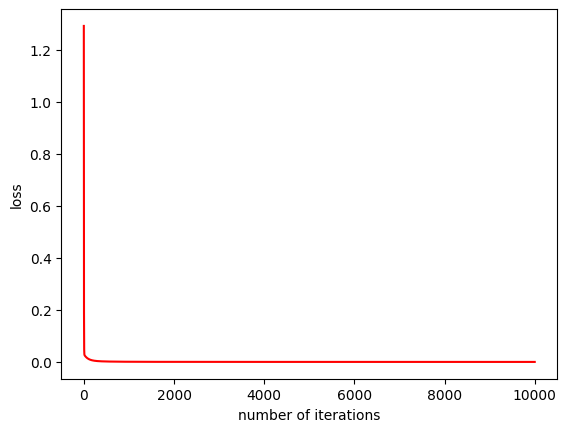

In [34]:
n=X_train.shape[0]
# Add bias term to X
X_b = np.c_[np.ones((n, 1)), X_train]
# Initialize parameters for linear regression
theta = np.random.randn(X_train.shape[1]+1, 1)
# Define the loss function and its gradient
def loss_function(X, y, theta):
    predictions = np.dot(X, theta)
    loss = np.mean((y - predictions) ** 2)
    return loss

def loss_gradient(X, y, theta):
    predictions = np.dot(X, theta)
    error = predictions - y
    #sign = np.sign(error)
    gradient = 2 * np.mean(error * X, axis=0, keepdims=True).T
    return gradient



# Hyperparameters
learning_rate = 0.09
n_iterations = 10000

# Gradient Descent
L=[]
for iteration in range(n_iterations):
    gradients = loss_gradient(X_b, y_train, theta)
    theta -= learning_rate * gradients
    cost = loss_function(X_b, y_train, theta)
    L.append(cost)

    if iteration % 100 == 0:
        cost = loss_function(X_b, y_train, theta)
        print(f"Iteration: {iteration}, Loss: {cost}")

# Predictions
m=X_test.shape[0]        
X_c = np.c_[np.ones((m, 1)), X_test]        
y_predictions = X_c.dot(theta)

# Plotting
plt.plot(L,'r')
plt.xlabel("number of iterations")
plt.ylabel("loss")
from sklearn.metrics import r2_score, mean_squared_error
# Calculate R2 score
r2_scratch = r2_score(y_test, y_predictions)
r2_skle = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse_scratch = mean_squared_error(y_test,y_predictions)
mse_skle = mean_squared_error(y_test,y_pred)
pred_data_scratch = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predictions.squeeze()})

In [35]:
print(pred_data_scratch)
print(r2_scratch)
print(mse_scratch)
print(r2_skle)
print(mse_skle)

        Actual  Predicted
0    -0.165313  -0.160485
1    -0.159902  -0.157938
2    -0.166249  -0.165599
3    -0.165628  -0.158570
4    -0.163737  -0.157466
...        ...        ...
1399 -0.166096  -0.151986
1400 -0.159092  -0.161602
1401 -0.154527  -0.159460
1402 -0.167239  -0.162374
1403 -0.158138  -0.158359

[1404 rows x 2 columns]
0.9466467094354294
4.7311168337911734e-05
0.972733642021781
2.4178513426609738e-05
